At Capital One, you'll almost always be working with a diverse team, often including business analysts, engineers, product managers, and senior leaders. The ability to not just complete data science work, but also to explain and present your work is important.
With that in mind, please deliver your answers as if you were handing off work to another data scientist joining your team. Tying together your intent, code, analysis and results is the goal.
The following artifacts are valued:
explanations of your intent, methods, conclusions and any assumptions
clear, documented, and well-structured code
instructions for running your code
methods you attempted that didn't work
ideas you didn't have time to complete but would have done with more time
a thorough write up with any pertinent visualizations
We ask that any code written by others is sourced/cited appropriately. We are excited to review your work and your interpretation of the data.

Data Science Challenge: Card Transactions!

This coding and analysis challenge is designed to test your skill and intuition analyzing real[-ish] world data. For the challenge, we will use credit card transactions data. Note that this dataset loosely resembles real transactional data from Capital One credit card customers, but the entities and relations within are purely fictional. No persons, places, or things lost their identity in the making of this dataset.
Required Questions: Please answer completely all four required questions.

Question 1: Load
- Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found here
- Please describe the structure of the data. Number of records and fields in each record?
- Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

In [42]:

data = []

with open('transactions.txt') as f:
    i = 0
    for line in f:
        if(i>5000): break
        data.append(json.loads(line))
        i+=1
        

Question 2: Plot
- Plot a histogram of the processed amounts of each transaction, the transactionAmount column.
- Report any structure you find and any hypotheses you have about that structure.

In [43]:
data[0]

{'accountNumber': '737265056',
 'customerId': '737265056',
 'creditLimit': 5000.0,
 'availableMoney': 5000.0,
 'transactionDateTime': '2016-08-13T14:27:32',
 'transactionAmount': 98.55,
 'merchantName': 'Uber',
 'acqCountry': 'US',
 'merchantCountryCode': 'US',
 'posEntryMode': '02',
 'posConditionCode': '01',
 'merchantCategoryCode': 'rideshare',
 'currentExpDate': '06/2023',
 'accountOpenDate': '2015-03-14',
 'dateOfLastAddressChange': '2015-03-14',
 'cardCVV': '414',
 'enteredCVV': '414',
 'cardLast4Digits': '1803',
 'transactionType': 'PURCHASE',
 'echoBuffer': '',
 'currentBalance': 0.0,
 'merchantCity': '',
 'merchantState': '',
 'merchantZip': '',
 'cardPresent': False,
 'posOnPremises': '',
 'recurringAuthInd': '',
 'expirationDateKeyInMatch': False,
 'isFraud': False}

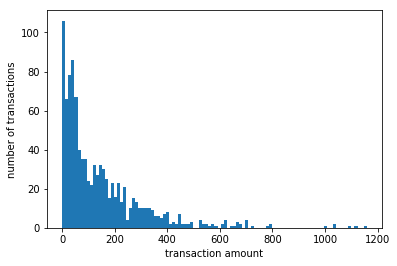

In [44]:
plt.hist(df.transactionAmount,bins=100)
plt.ylabel("number of transactions")
plt.xlabel("transaction amount")
plt.show()

In [47]:
df = pd.DataFrame(data)
df.head(3)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False


Question 3: Data Wrangling - Duplicate Transactions
You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.
- Can you programmatically identify reversed and multi-swipe transactions?
- What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)
- Did you find anything interesting about either kind of transaction?

Question 4: Model
Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.
- Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).
- Provide an estimate of performance using an appropriate sample, and show your work.
- Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)
Thank you very much for your efforts! We look forward to reviewing your insights!

In [65]:
acct_id, num_tx = np.unique(df.accountNumber,return_counts=True)
mask = (acct_id[1] == df.accountNumber)
acct_df =df[mask]


acct_df[(acct_df.isFraud==False) ]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
968,114896048,114896048,15000.0,15000.00,2016-01-01T17:50:18,288.77,cheapfast.com,US,US,05,...,,0.00,,,,False,,,False,False
969,114896048,114896048,15000.0,14711.23,2016-01-02T18:04:02,355.60,Uber,US,US,02,...,,288.77,,,,False,,,False,False
970,114896048,114896048,15000.0,14355.63,2016-01-06T05:41:42,241.67,cheapfast.com,US,US,09,...,,644.37,,,,False,,,False,False
972,114896048,114896048,15000.0,13815.11,2016-01-07T07:05:28,44.68,cheapfast.com,US,US,09,...,,1184.89,,,,False,,,False,False
973,114896048,114896048,15000.0,13770.43,2016-01-08T12:40:37,45.17,amazon.com,US,US,05,...,,1229.57,,,,False,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,114896048,114896048,15000.0,1786.71,2016-12-24T21:57:38,103.04,Uber,US,US,05,...,,13213.29,,,,False,,,False,False
1502,114896048,114896048,15000.0,1683.67,2016-12-25T12:45:08,31.10,Uber,US,US,05,...,,13316.33,,,,False,,,False,False
1503,114896048,114896048,15000.0,1652.57,2016-12-27T04:00:56,0.42,oldnavy.com,US,US,05,...,,13347.43,,,,False,,,False,False
1504,114896048,114896048,15000.0,1652.15,2016-12-29T16:20:33,119.98,Walgreens #644096,US,US,02,...,,13347.85,,,,False,,,False,False


In [66]:
acct_df[(acct_df.isFraud==True) ]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
971,114896048,114896048,15000.0,14113.96,2016-01-06T08:05:06,298.85,sears.com,US,US,09,...,,886.04,,,,False,,,False,True
1072,114896048,114896048,15000.0,13702.47,2016-03-07T02:40:54,406.89,Planet Fitness #136615,US,US,09,...,,1297.53,,,,False,,,False,True
1113,114896048,114896048,15000.0,8943.58,2016-04-09T15:14:04,439.31,oldnavy.com,US,US,09,...,,6056.42,,,,False,,,False,True
1321,114896048,114896048,15000.0,5223.03,2016-08-24T01:24:35,266.09,sears.com,US,US,09,...,,9776.97,,,,False,,,False,True
1345,114896048,114896048,15000.0,3094.15,2016-09-08T15:51:39,195.28,Uber,US,US,02,...,,11905.85,,,,False,,,False,True
1346,114896048,114896048,15000.0,2898.87,2016-09-08T22:19:31,241.73,Uber,US,US,09,...,,12101.13,,,,False,,,False,True
1367,114896048,114896048,15000.0,5422.83,2016-09-20T20:45:01,104.34,apple.com,US,US,09,...,,9577.17,,,,False,,,False,True
1416,114896048,114896048,15000.0,11866.15,2016-10-24T04:26:33,143.07,oldnavy.com,US,US,09,...,,3133.85,,,,False,,,False,True
